In [39]:
## Imports 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from matplotlib.pylab import rcParams
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [32]:
df_penguins=pd.read_csv("penguins.csv")
# Step 2: Preprocess the data (handle missing values)
df_penguins.dropna(inplace=True)

le = LabelEncoder()
df_penguins.species = le.fit_transform(df_penguins.species)
df_penguins.species.unique()

array([0, 2, 1])

In [92]:
# Encoding categorical vairables 
df1 = pd.get_dummies(df_penguins[['island', 'sex']],
                    prefix = ['island', 'sex'], drop_first=True )
df2 = pd.concat([df_penguins, df1], axis=1)
df2.drop(['island', 'sex','rowid'], axis = 1, inplace = True)
df2.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Dream,island_Torgersen,sex_male
0,0,39.1,18.7,181.0,3750.0,2007,False,True,True
1,0,39.5,17.4,186.0,3800.0,2007,False,True,False
2,0,40.3,18.0,195.0,3250.0,2007,False,True,False
4,0,36.7,19.3,193.0,3450.0,2007,False,True,False
5,0,39.3,20.6,190.0,3650.0,2007,False,True,True


In [93]:
# Defining the x and y variables
X = df2.drop('species', axis= 1)
y = df2['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state= 100) 
# Initalization of the decisiontreeclassifier
dtc = DecisionTreeClassifier()
# fitting on model
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

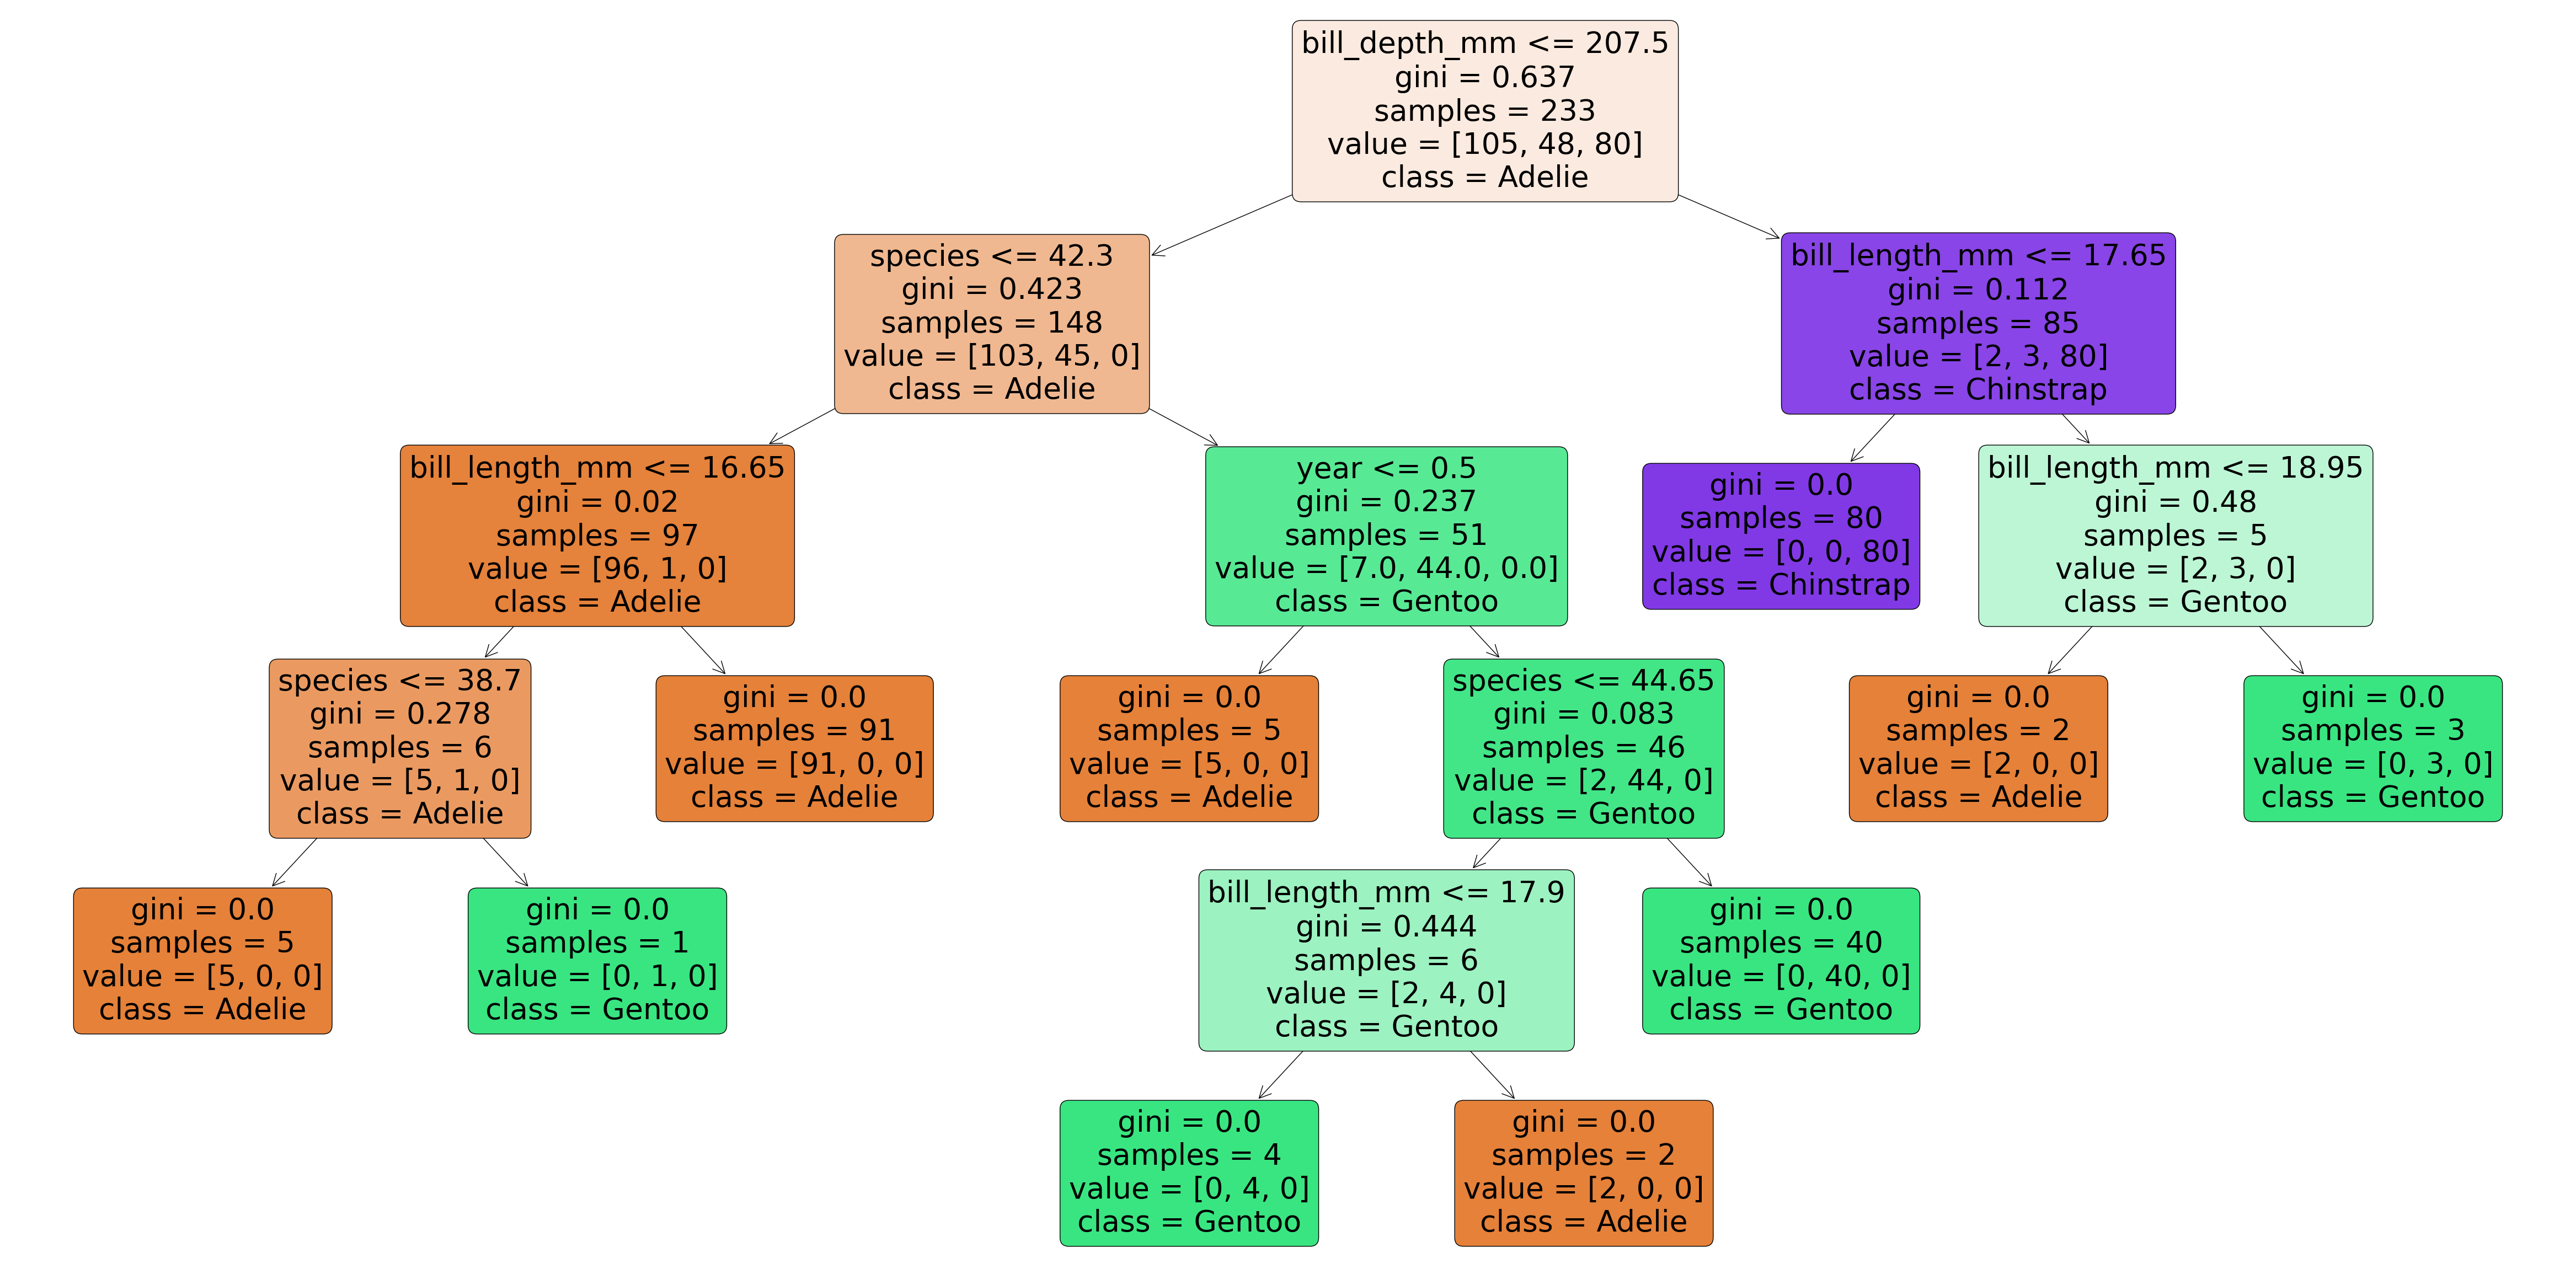

In [94]:
# Building initial model
plt.figure(figsize=(60, 30))
plot_tree(dtc, feature_names= df2.columns, class_names= ['Adelie','Gentoo','Chinstrap'], filled= True, rounded = True )
plt.show()

In [95]:
# Model prediction
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
# checking accuracy on train data

print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

1.0


array([[105,   0,   0],
       [  0,  48,   0],
       [  0,   0,  80]], dtype=int64)

In [96]:
# checking accuracy on test data
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.97


array([[41,  0,  0],
       [ 1, 19,  0],
       [ 2,  0, 37]], dtype=int64)

In [97]:
## Hyperparameter turning 
# Creating the user defined function for tree plotting 
def get_decision_tree(data):
    plt.figure(figsize=(60,30))
    plot_tree(data, feature_names= df2.columns, class_names= ['Adelie','Gentoo','Chinstrap'], filled= True, rounded = True)
    plt.show()
# Creating the user defined function for model evaluation
def eval_mat(data):
    y_train_pred = data.predict(X_train)
    y_test_pred = data.predict(X_test)
    accuracytr= accuracy_score(y_train, y_train_pred)
    accuracytest = accuracy_score(y_test, y_test_pred)
    print(f"Train Performance={accuracytr}, Test performance = {accuracytest}")


In [105]:
# hyperparametr tuning
dt = DecisionTreeClassifier(random_state=100)
# Defining hyperparameters
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [5,10,15,20,25],
    'criterion': ['gini', 'entropy']   
}

# creating model through GridSearchCV
grid_search= GridSearchCV(estimator= dt, param_grid = params, cv= 4, n_jobs=-1, verbose=1, scoring= 'accuracy')
# model fitting
grid_search.fit(X_train, y_train)
# Checking out the results

grid_search.cv_results_

Fitting 4 folds for each of 30 candidates, totalling 120 fits


{'mean_fit_time': array([0.00411057, 0.00608093, 0.00525802, 0.00484997, 0.00588292,
        0.00518787, 0.00707346, 0.00570464, 0.00508463, 0.00443578,
        0.00439131, 0.00579351, 0.00562382, 0.00475669, 0.00455183,
        0.00500375, 0.00410992, 0.00592107, 0.00611049, 0.00669229,
        0.00625604, 0.00603533, 0.00597382, 0.00444323, 0.00551033,
        0.00443655, 0.00426131, 0.00475717, 0.0053789 , 0.00497729]),
 'std_fit_time': array([0.00073398, 0.00114462, 0.00041818, 0.00063358, 0.00073886,
        0.00040865, 0.00043238, 0.00082338, 0.00082041, 0.00077947,
        0.00062129, 0.00068291, 0.00075446, 0.00062444, 0.00087805,
        0.00069805, 0.00098542, 0.00120553, 0.00054603, 0.00041197,
        0.00043035, 0.00071181, 0.00076544, 0.00097605, 0.00110664,
        0.00100096, 0.00045243, 0.00021916, 0.00129354, 0.00070184]),
 'mean_score_time': array([0.00443155, 0.00363874, 0.00275379, 0.00342917, 0.00409693,
        0.00522298, 0.00342906, 0.00330782, 0.00266474, 0.00

In [99]:
# Creating the dataframe with result
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.shape
# Best parameters
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5,
                       random_state=100)

In [100]:
# Best score
grid_search.best_score_

0.9484219754529515

In [101]:
# best parameters
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5}

In [102]:
# Taking out the best parameters for the model building
dt_best = grid_search.best_estimator_

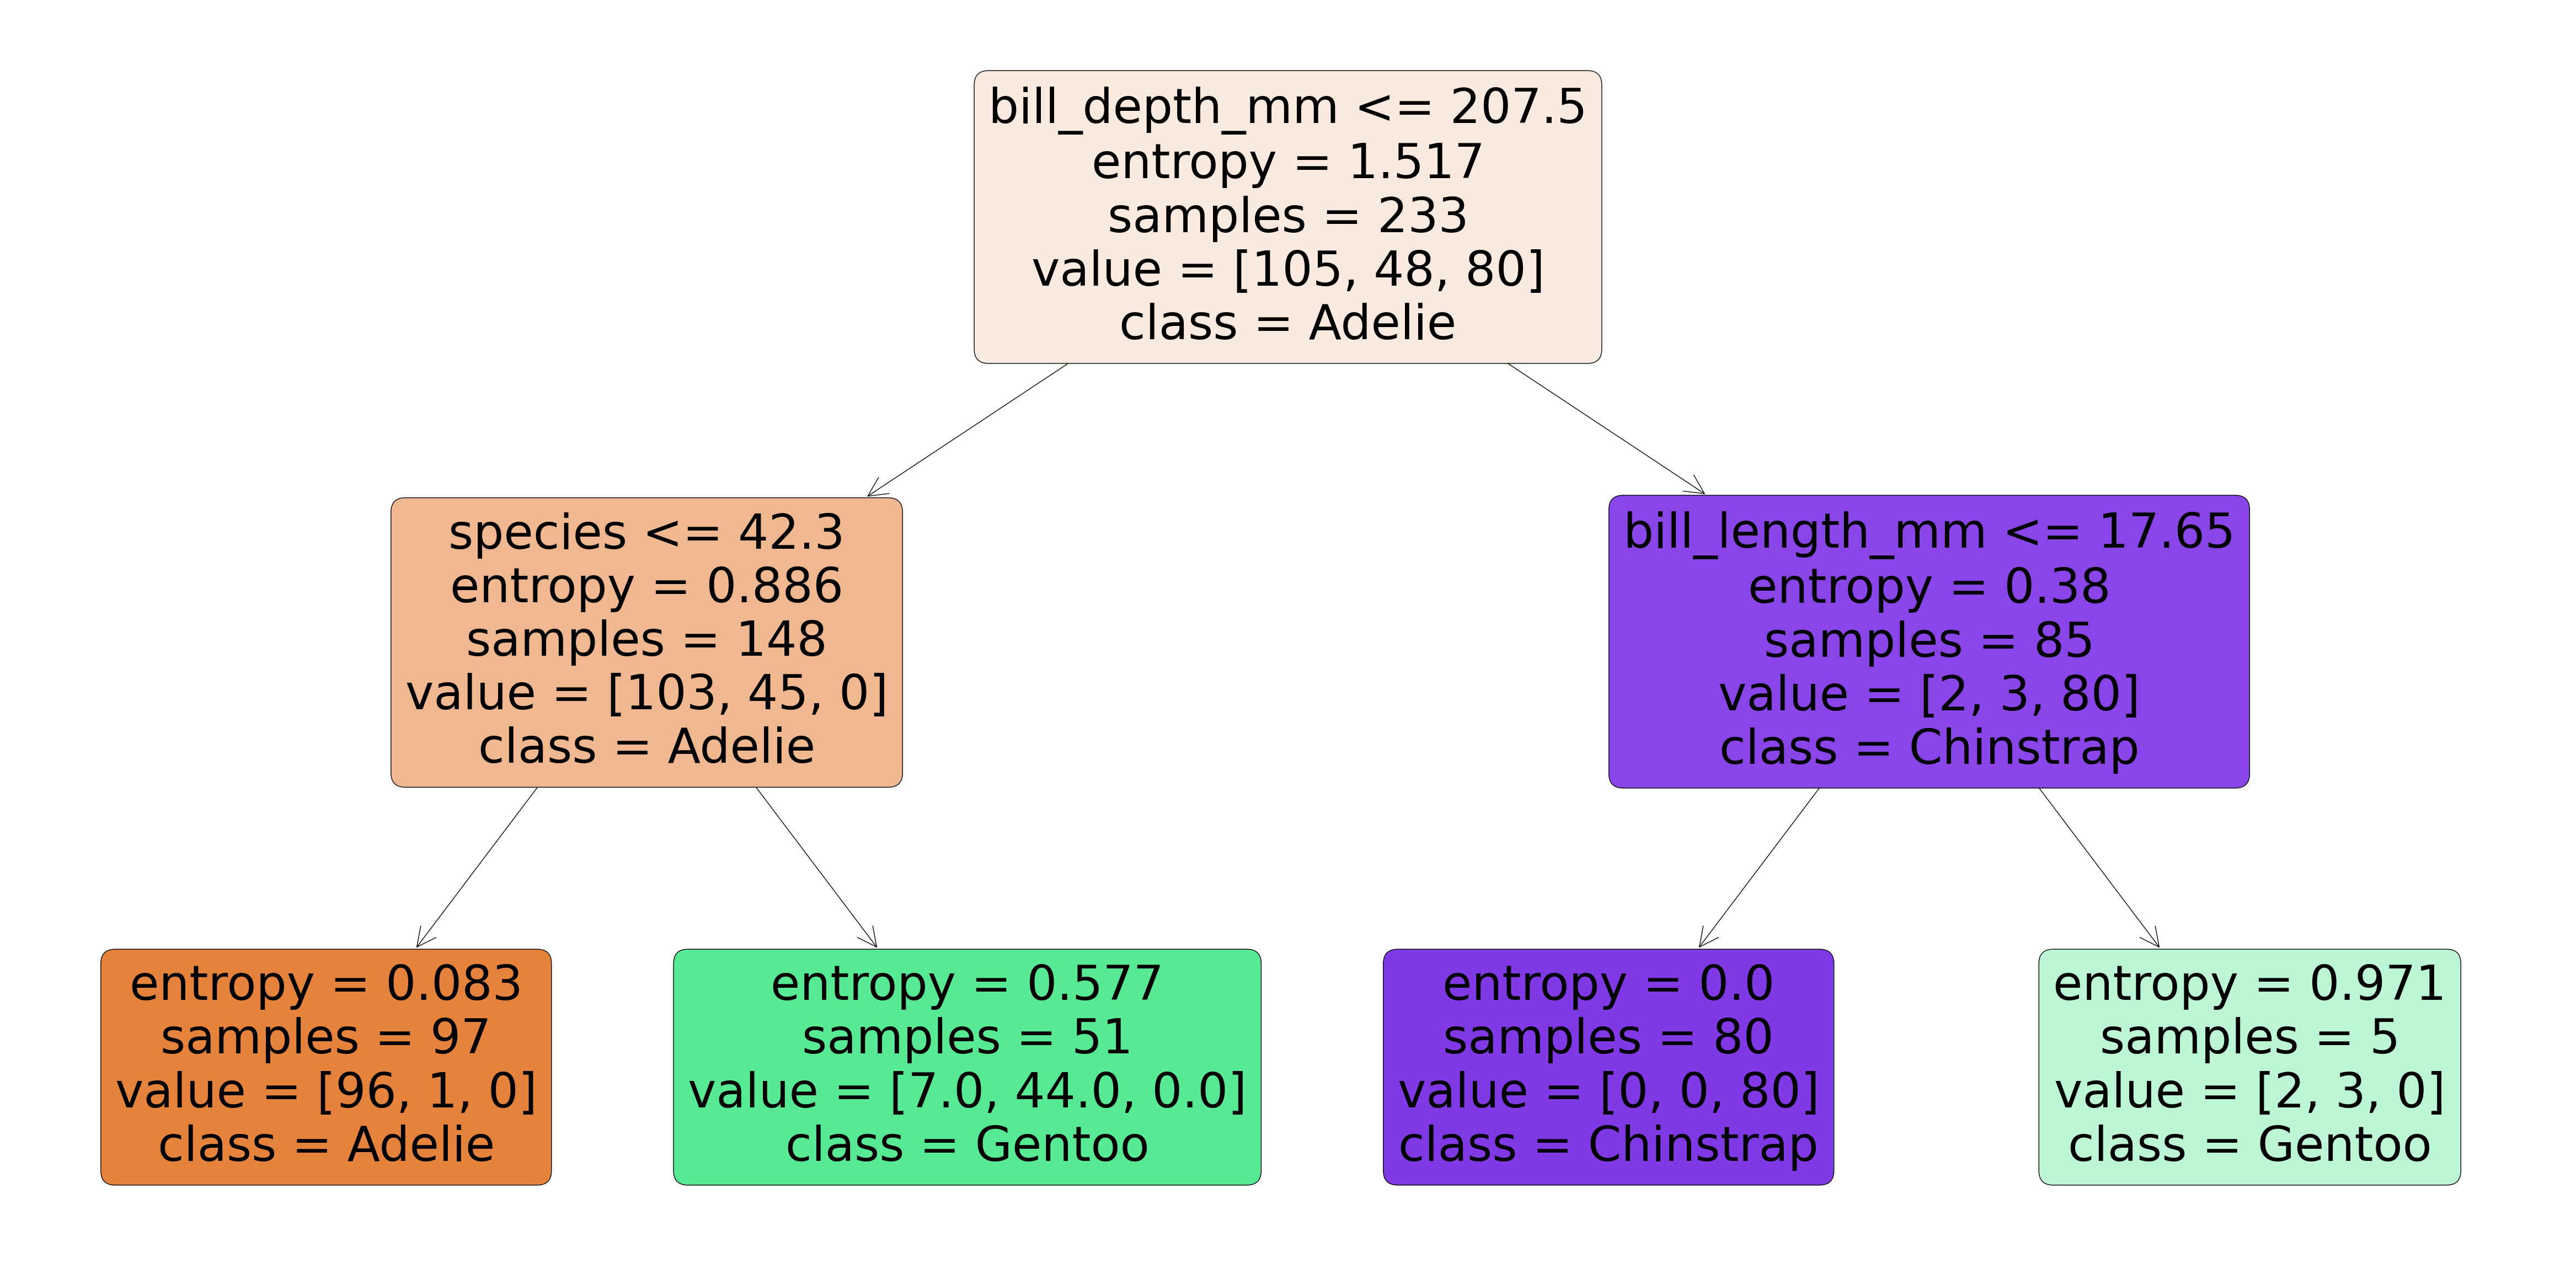

In [103]:
# Draw the decision tree
get_decision_tree(dt_best)

In [104]:
# Checking for the accuracy score
eval_mat(dt_best)

Train Performance=0.9570815450643777, Test performance = 0.94
